# Session 1: Introduction to Python

In this notebook, we introduce the basics of Python. There are lots of good resources online for this. 

Python/Numpy Tutorial: http://cs231n.github.io/python-numpy-tutorial/ and https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb

## Import Libraries

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model

## Training and running a linear model using Scikit-Learn

### Fetch the data

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
LIFESAT_PATH = "datasets/lifesat"
URL = DOWNLOAD_ROOT + LIFESAT_PATH
oecd_path = os.path.join(LIFESAT_PATH, "oecd_bli_2015.csv")
gdp_path = os.path.join(LIFESAT_PATH, "gdp_per_capita.csv")

if not os.path.isdir(LIFESAT_PATH):
    os.makedirs(LIFESAT_PATH)

urllib.request.urlretrieve(URL + "/oecd_bli_2015.csv", oecd_path)
urllib.request.urlretrieve(URL + "/gdp_per_capita.csv", gdp_path)

('datasets/lifesat\\gdp_per_capita.csv',
 <http.client.HTTPMessage at 0x20374f0a5f8>)

### Load the data

In [3]:
oecd_bli = pd.read_csv(LIFESAT_PATH + "/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(LIFESAT_PATH + "/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

### Prepare the data

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

### Visualize the data

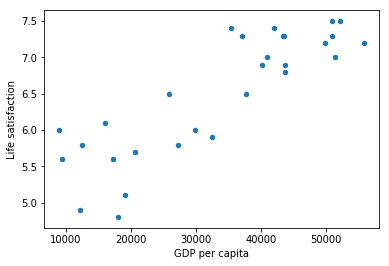

In [5]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

### Select a linear model

In [6]:
lin_reg_model = sklearn.linear_model.LinearRegression()

### Train the model

In [7]:
lin_reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Make a prediction for Cyprus

In [8]:
X_new = [[22587]]  # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]
